In [1]:
%env ROS_IP=127.0.0.1
%env ROS_MASTER_URI=http://127.0.0.1:11311

!export ROS_MASTER_URI=http://127.0.0.1:11311
!export ROS_IP=127.0.0.1

!echo $ROS_IP
!echo $ROS_MASTER_URI


env: ROS_IP=127.0.0.1
env: ROS_MASTER_URI=http://127.0.0.1:11311
127.0.0.1
http://127.0.0.1:11311


In [1]:
from visioncraft.locobot.camera import LocobotCamera
from visioncraft.locobot.arm_control import LocobotArmControl
from geometry_msgs.msg import Pose
from tf.transformations import quaternion_from_euler
import numpy as np
import matplotlib.pyplot as plt


In [2]:
cam = LocobotCamera(use_simulation=False)


In [3]:
arm_control = LocobotArmControl(use_simulation=False)


[INFO] [1745979580.346231]: Waiting for joint trajectory action on /locobot/arm_controller/follow_joint_trajectory…
[INFO] [1745979580.514308]: Joint‐space action server ready
[ INFO] [1745979580.548462854]: Loading robot model 'locobot'...
[ INFO] [1745979580.548491857]: No root/virtual joint specified in SRDF. Assuming fixed joint


[ WARN] [1745979580.546836078]: Link 'locobot/caster_back_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1745979580.547700497]: Link 'locobot/caster_front_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1745979580.547731856]: Link 'locobot/wheel_left_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1745979580.547746744]: Link 'locobot/wheel_right_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1745979580.547765686]: Link 'locobot/caster_back_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1745979580.547779642]: Link 'locobot/caster_front_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1745979580.547799900]: Link 'locobot/wheel_left_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1745979580.547814026]: Link 'locobot/wheel_right_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1745979580.547830025]: Link 'locobot/ca

[ INFO] [1745979582.177659003]: Ready to take commands for planning group interbotix_arm.
[INFO] [1745979582.684814]: LocobotArmControl initialized


In [4]:
arm_control.open_gripper()

In [5]:
arm_control.close_gripper()

object detected


In [6]:
arm_control.move_arm_joints(LocobotArmControl.JOINT_SLEEP)

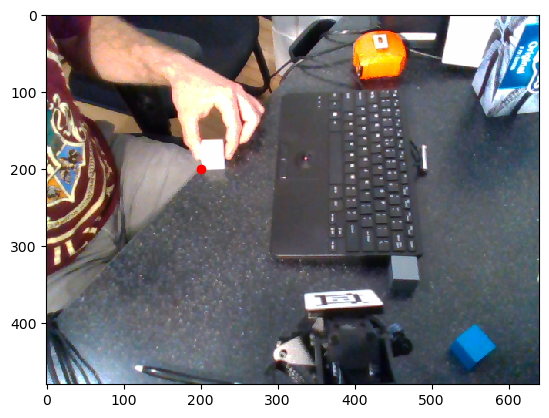

In [7]:
# Example: Grab cube at center of image
cam.pan(0.0)
cam.tilt(1.1)
height, width = cam.image.shape[:2]
center_x = 200
center_y = 200

plt.imshow(cam.image)
# add point on top of the image
plt.scatter(center_x, center_y, color='red')

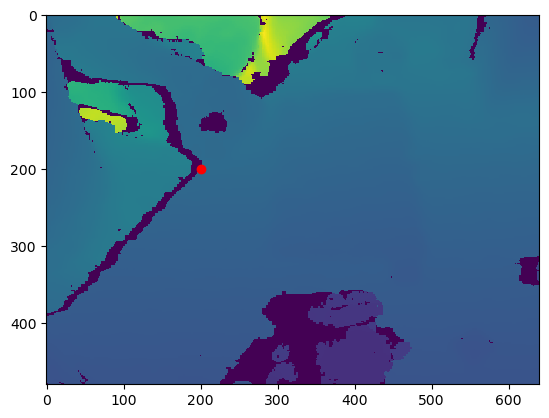

In [8]:
plt.imshow(cam.depth_image)
# add point on top of the image
plt.scatter(center_x, center_y, color='red')

In [9]:
point_cam = cam.get_point_at_pixel(center_x, center_y)
print(point_cam)


point_base = cam.get_target_coordinate_from_camera(point_cam)
print(point_base)

[-0.1358579  -0.03416454  0.665     ]
[0.4832762070719038, 0.14687895301964926, 0.015731406286446648]


In [ ]:
print(f"Point in base frame: {point_base}")

arm_control.pick(point_base)

Point in base frame: [0.4832762070719038, 0.14687895301964926, 0.015731406286446648]
object detected


In [ ]:
point_base_2 = point_base + np.array([-0.1, -0.1, 0.03])
arm_control.place(point_base_2)
arm_control.open_gripper()